In linux:

sudo R

sudo apt-get install python-virtualenv

sudo bash Anaconda3-2019.03-Linux-x86_64.sh

%then reopen the terminal

pip install louvain

pip install umap-learn

sudo apt-get install libudunits2-dev

sudo apt install libgdal-dev

sudo apt-get install mesa-common-dev

sudo apt-get install xorg 

sudo apt-get install libcgal-dev libglu1-mesa-dev libglu1-mesa-dev

sudo apt-get install libx11-dev 

sudo apt-get install libglu1-mesa-dev

conda install -c r r-rgl 

In R:

devtools::dev_mode(path='~/tools/Monocle3/')

source("http://bioconductor.org/biocLite.R")

biocLite()

biocLite("monocle")

install.packages("reticulate")

library(reticulate)

devtools::install_github("cole-trapnell-lab/DDRTree", ref="simple-ppt-like")

devtools::install_github("cole-trapnell-lab/L1-graph")

devtools::install_github("cole-trapnell-lab/monocle-release", ref="monocle3_alpha")

#py_install('umap-learn', pip = T, pip_ignore_installed = T) #It doesn't work

#py_install("louvain") #It doesn't work

In [1]:
library(Seurat)
library(dplyr)
library(monocle)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Warning message in system2(command = python, args = paste0("\"", config_script, :
“running command ''/woldlab/loxcyc/home/diane/.virtualenvs/jupyter/bin/python' "/usr/lib/R/site-library/reticulate/config/config.py" 2>/dev/null' had status 134”Warning message in fun(libname, pkgname):
“TBB library  not found.”Warning message in fun(libname, pkgname):
“TBB malloc library  not found.”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: DelayedArray
Loading required package: stats4
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count

Loading required package: BiocGenerics
Loading required package: parallel



In [2]:
output_prefix="blood"
num_dim = 10

In [3]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux bullseye/sid

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] monocle_2.99.3          L1Graph_0.1.1           lpSolveAPI_5.5.2.0-17.4
 [4] DDRTree_0.1.5           irlba_2.3.3             igraph_1.2.4.1         
 [7] ggplot2_3.2.1           Biobase_2.44.0          DelayedArray_0.10.0    


In [4]:
R.utils::sourceDirectory('/opt/Monocle3-alpha-plus/',modifiedOnly=FALSE,verbose=TRUE)

In [5]:
DeepGenes <- read.table("190220DeepTree4000genes.txt",sep="_")
DeepGenes2=as.vector(unlist(DeepGenes[,2]))

In [6]:
load("190627MouseLimb10X_Monocle3.Robj")

In [7]:
MouseFull <- ReadH5AD(file = "../190714MouseLimb10Xraw.h5ad")

Pulling expression matrices and metadata
Data is unscaled
Creating assay object
Storing X as raw and raw as counts
No variable feature expression found in h5ad file
No dimensional reduction information found
Assembling Seurat object
No nearest-neighbor graph


In [8]:
pData(updated_MouseLimb10X_Monocle)$bh.pval.more.than.0.1 <- !MouseFull@meta.data$bh.pval.less.than.0.1

In [9]:
head(pData(updated_MouseLimb10X_Monocle))

,nGene,nUMI,orig.ident,percent.mito,res.0.6,res.0.7,res.1,res.0.9,res.0.8,res.0.5,res.0.3,res.1.5,res.0.1,batch,stage,Size_Factor,Total_mRNAs,num_genes_expressed,louvain_component,bh.pval.more.than.0.1
,<int>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>,<lgl>
limb12_13_0AAACCTGAGATCGATA_1,3404,11426,3,0.01636618,3,3,2,3,2,4,3,3,0,limb12,13.0,1.5223071,11426,3404,1,FALSE
limb12_13_0AAACCTGAGATGAGAG_1,2322,6474,2,0.01328390,0,1,10,1,0,3,2,6,0,limb12,13.0,0.8625430,6474,2322,1,TRUE
limb12_13_0AAACCTGAGCAGATCG_1,2162,8269,5,0.01160963,12,11,12,11,11,8,5,16,3,limb12,13.0,1.1016942,8269,2162,5,TRUE
limb12_13_0AAACCTGAGCGATCCC_1,3771,14966,6,0.01109181,11,10,11,10,10,9,6,10,0,limb12,13.0,1.9939479,14966,3771,1,TRUE
limb12_13_0AAACCTGAGTGTACCT_1,2517,7649,1,0.01804157,11,0,1,0,0,0,1,20,0,limb12,13.0,1.0190904,7649,2517,1,TRUE
limb12_13_0AAACCTGAGTTGTAGA_1,1871,4317,1,0.02200602,1,0,1,0,0,0,1,20,0,limb12,13.0,0.5751619,4317,1871,1,TRUE


In [10]:
cell_type_color <- c('0'='#000000',
           '1'='#0118FA',
           '2'='#C0C0C0',
           '3'='#00FFFF',
           '4'='#FF8380',
           '5'='#8B8A1D',
           '6'='#CAC379',
           '7'='#00FF00',
           '8'='#FFFA2C',
           '9'='#C39CFB',
           '10'='#7762F0',
           '11'='#717E8D',
           '12'='#A71206',
           '13'='#35B5E2',
           '14'='#9834E7',
           '15'='#995432',
           '16'='#483F84',
           '17'='#ff0000',
           '18'='#216407',
           '19'='#ff42ef',
           '20'='#FBC83C',
           '21'='#FF9A21',
           '22'='#B4246E',
           '23'='#09658A',
           '24'='#016edb')

In [11]:
DelayedArray:::set_verbose_block_processing(TRUE)

[1] FALSE

In [12]:
updated_MouseLimb10X_Monocle <- updated_MouseLimb10X_Monocle[,
                        pData(updated_MouseLimb10X_Monocle)$bh.pval.more.than.0.1]

In [13]:
options(DelayedArray.block.size=1000e6)

In [14]:
updated_MouseLimb10X_Monocle <- estimateSizeFactors(updated_MouseLimb10X_Monocle)
updated_MouseLimb10X_Monocle <- estimateDispersions(updated_MouseLimb10X_Monocle)

Processing block 1/122 ... OK
Processing block 2/122 ... OK
Processing block 3/122 ... OK
Processing block 4/122 ... OK
Processing block 5/122 ... OK
Processing block 6/122 ... OK
Processing block 7/122 ... OK
Processing block 8/122 ... OK
Processing block 9/122 ... OK
Processing block 10/122 ... OK
Processing block 11/122 ... OK
Processing block 12/122 ... OK
Processing block 13/122 ... OK
Processing block 14/122 ... OK
Processing block 15/122 ... OK
Processing block 16/122 ... OK
Processing block 17/122 ... OK
Processing block 18/122 ... OK
Processing block 19/122 ... OK
Processing block 20/122 ... OK
Processing block 21/122 ... OK
Processing block 22/122 ... OK
Processing block 23/122 ... OK
Processing block 24/122 ... OK
Processing block 25/122 ... OK
Processing block 26/122 ... OK
Processing block 27/122 ... OK
Processing block 28/122 ... OK
Processing block 29/122 ... OK
Processing block 30/122 ... OK
Processing block 31/122 ... OK
Processing block 32/122 ... OK
Processing block 

In [15]:
options(future.globals.maxSize= 8096 * 1024^2)
library(future)
plan(strategy = "multicore", workers = 30)


Attaching package: ‘future’

The following objects are masked from ‘package:igraph’:

    %->%, %<-%

The following object is masked from ‘package:IRanges’:

    values

The following object is masked from ‘package:S4Vectors’:

    values



Processing block 1/6 ... OK
Processing block 2/6 ... OK
Processing block 3/6 ... OK
Processing block 4/6 ... OK
Processing block 5/6 ... OK
Processing block 6/6 ... OK


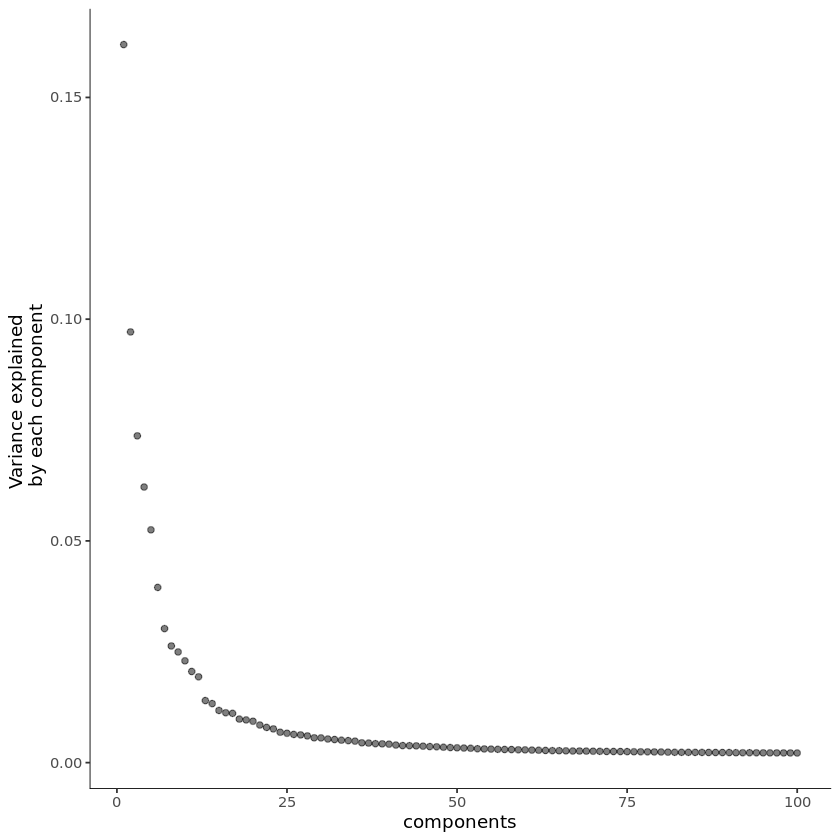

In [16]:
plot_pc_variance_explained(updated_MouseLimb10X_Monocle)

## Blood

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Processing block 1/1 ... OK


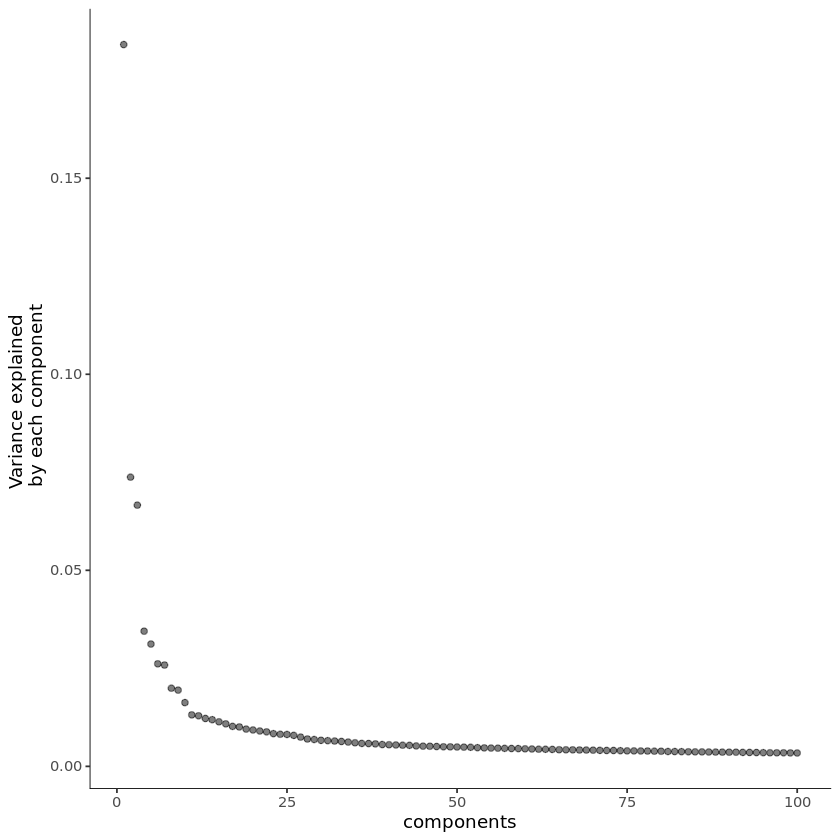

In [17]:
cds = ClusterSubsetPCA_3alpha(updated_MouseLimb10X_Monocle,idents=c("8","13","20","21","23"),genes = DeepGenes2)
plot_pc_variance_explained(cds)

In [18]:
stage = 10.5
cell_size = 0.8
plasma_end = 0.85

In [19]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = num_dim)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)

cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)


Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Python '/woldlab/loxcyc/home/diane/.virtualenvs/htsworkflow/bin/python' was requested but '/usr/bin/python' was loaded instead (see reticulate::py_config() for more information)”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

## Blood dim 10 orig.ident

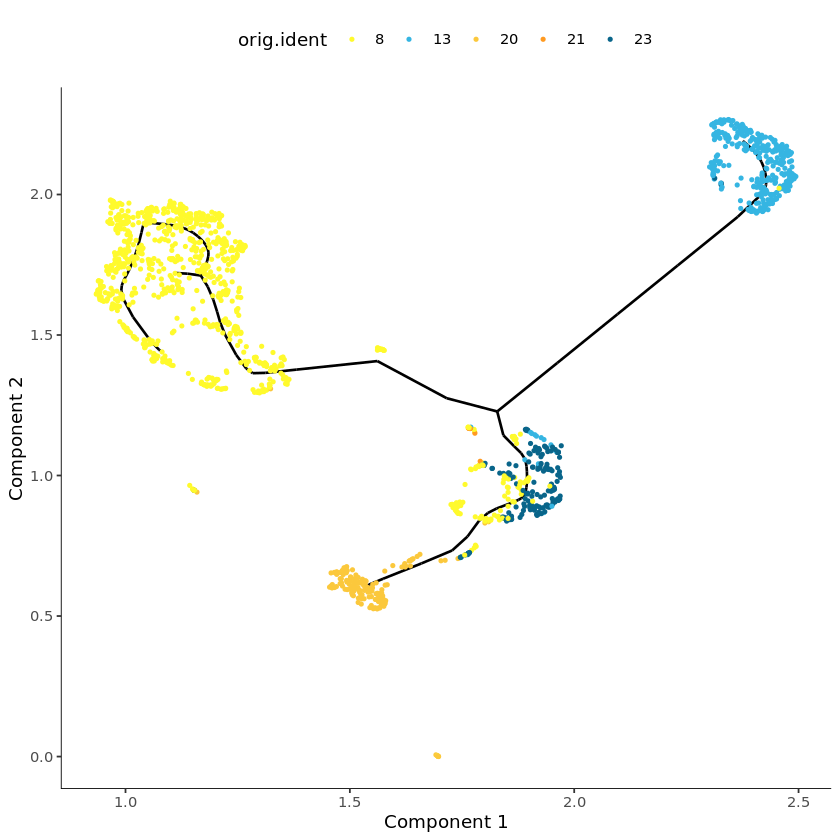

In [20]:
color_by="orig.ident"
plot_orig = plot_cell_trajectory(cds, cell_size=cell_size, color_by=color_by) +
            scale_color_manual(values=cell_type_color)
filename = sprintf("%s-dim%d-%s-%0.1f.svg", output_prefix, num_dim, color_by, cell_size)
ggsave(filename, plot=plot_orig, dev="svg", width=24*4, height=30*4, units="mm")

plot_orig

## Blood dim 10 Psuedotime

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


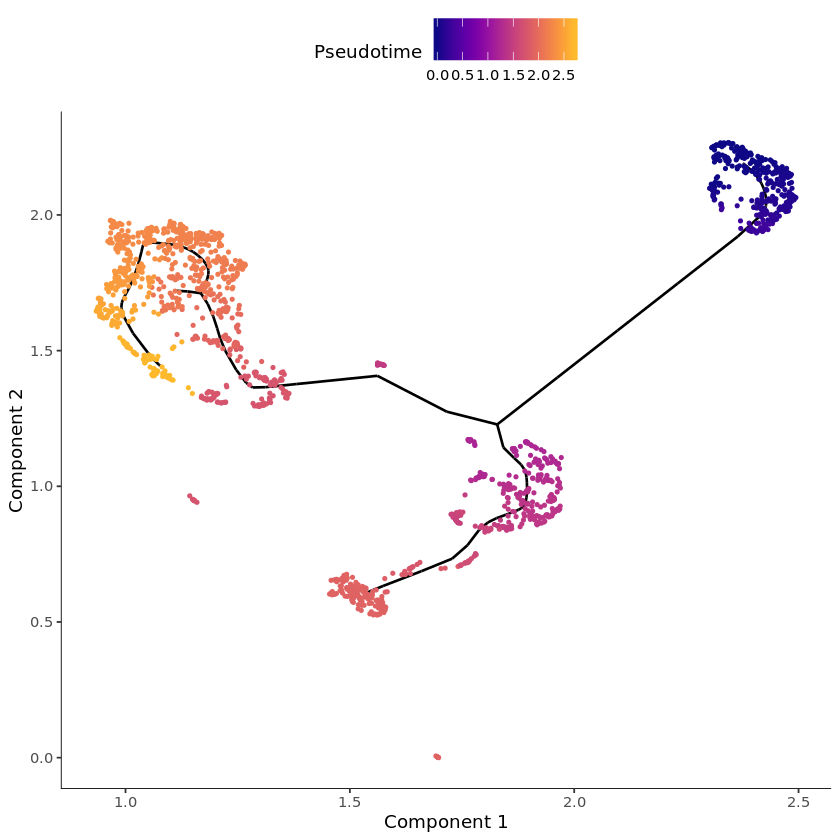

In [21]:
color_by="Pseudotime"
plot_pseudo <- plot_cell_trajectory(cds, cell_size=cell_size, color_by=color_by) + 
               viridis::scale_color_viridis(option="plasma", end=plasma_end)
filename = sprintf("%s-dim%d-%s-%0.1f.svg", output_prefix, num_dim, tolower(color_by), cell_size)
ggsave(filename, plot=plot_pseudo, dev="svg", width=24*4, height=30*4, units="mm")

plot_pseudo

## Blood dim 10 stage

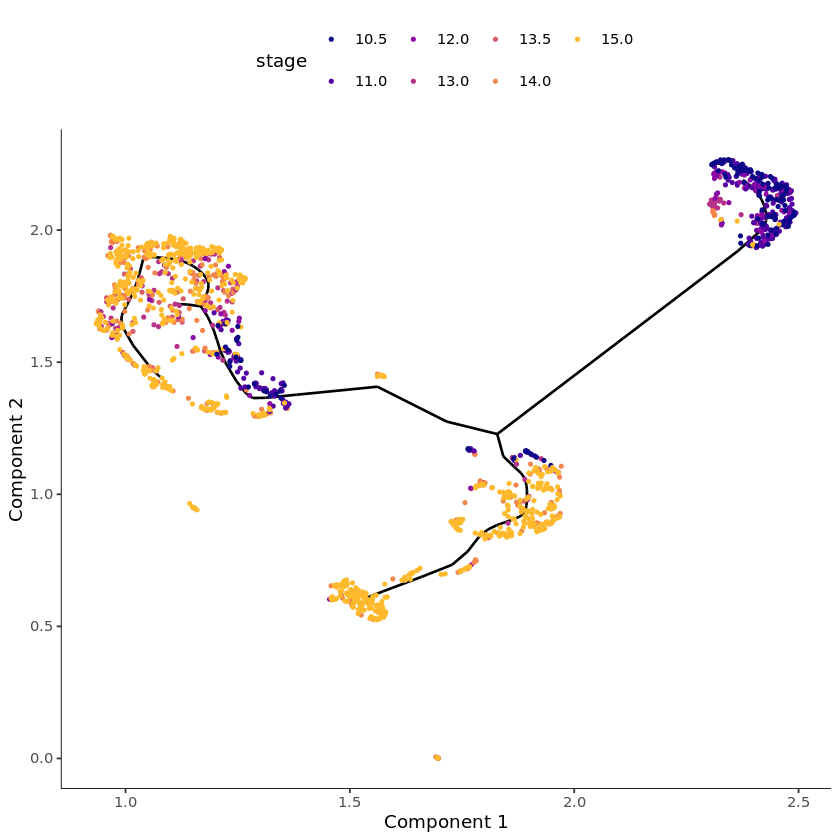

In [22]:
color_by="stage"
plot_stage = plot_cell_trajectory(cds, cell_size=cell_size, color_by=color_by) + 
             viridis::scale_color_viridis(option="plasma", end=plasma_end, discrete=TRUE)
filename = sprintf("%s-dim%d-%s-%0.1f.svg", output_prefix, num_dim, color_by, cell_size)
ggsave(filename, plot=plot_stage, dev="svg", width=24*4, height=30*4, units="mm")
plot_stage

In [23]:
plot_marker_gene = function(cds, marker, cell_size) {
    low_color = 'white'

    plot = plot_cell_trajectory(
        cds,
        use_color_gradient=TRUE,
        cell_size=cell_size,
        markers=c(marker)) + 
    scale_color_gradient(low=low_color, high="red", na.value=low_color)
    filename = sprintf('%s-dim%d-%s-%0.1f-direct.svg', output_prefix, num_dim, tolower(marker), cell_size)
    cat(sprintf("Saving to %s", filename))
    ggsave(filename, plot=plot, dev="svg", width=24*4, height=30*4, units="mm")
    plot
}

In [24]:
cell_size=0.3

## Blood dim 10 Pax3

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-pax3-0.3-direct.svg

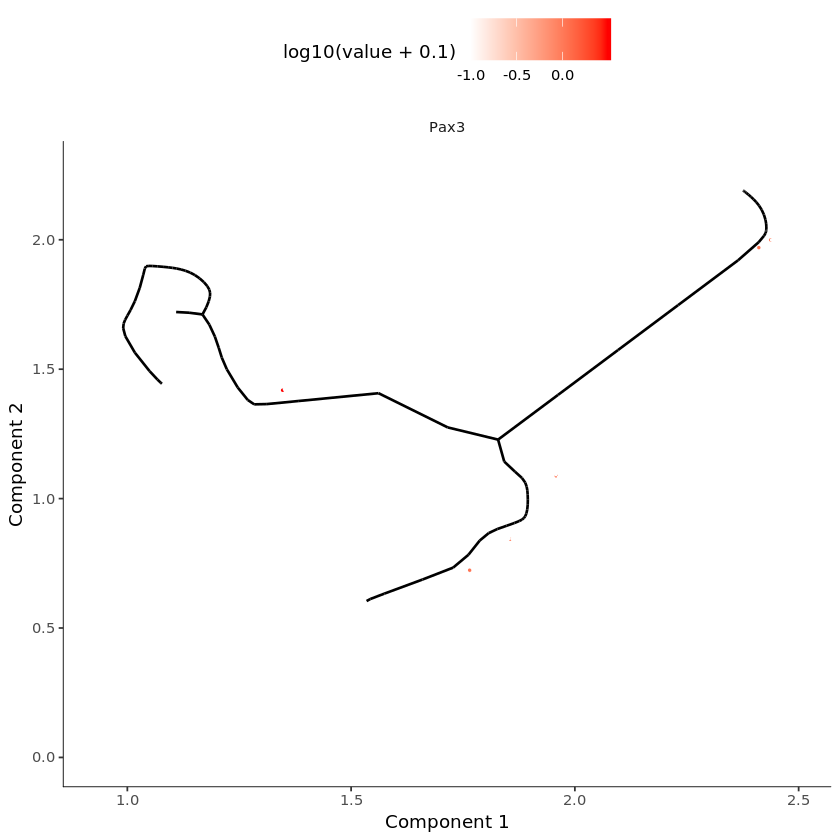

In [25]:
plot_marker_gene(cds, "Pax3", cell_size)

## Blood dim 10 Myod1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-myod1-0.3-direct.svg

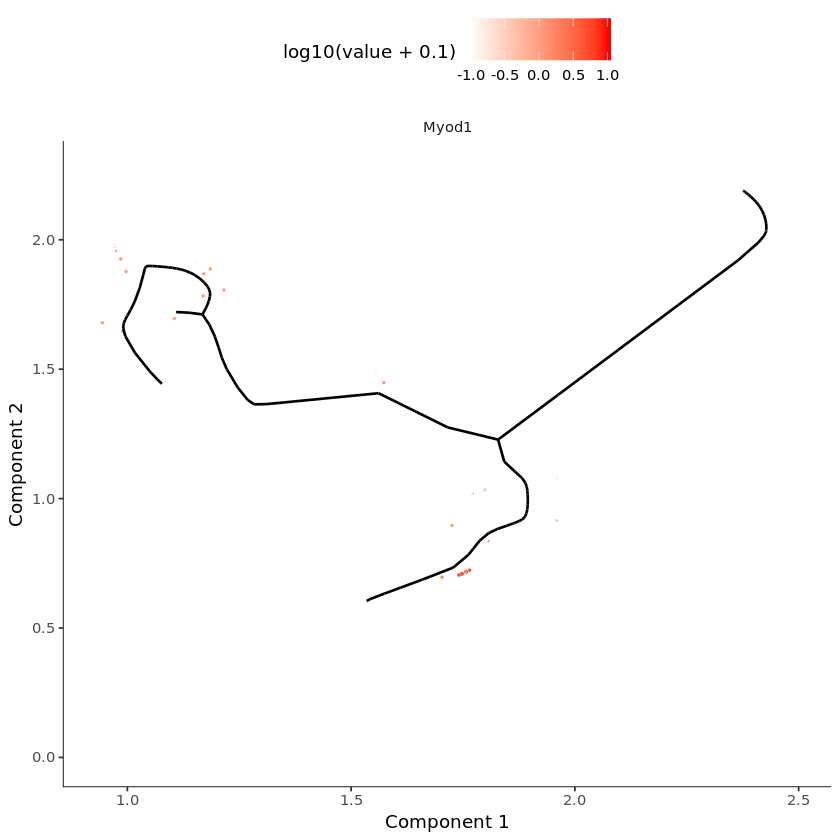

In [26]:
plot_marker_gene(cds, "Myod1", cell_size)

## Blood dim 10 Msc

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-msc-0.3-direct.svg

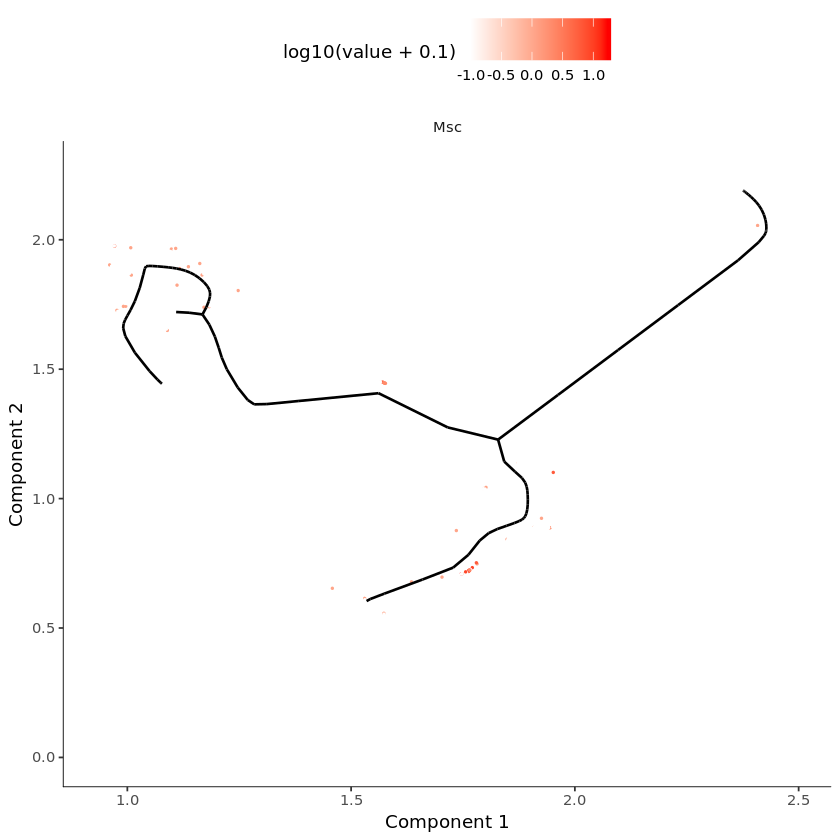

In [27]:
plot_marker_gene(cds, "Msc", cell_size)

## Blood dim 10 Tnnc1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-tnnc1-0.3-direct.svg

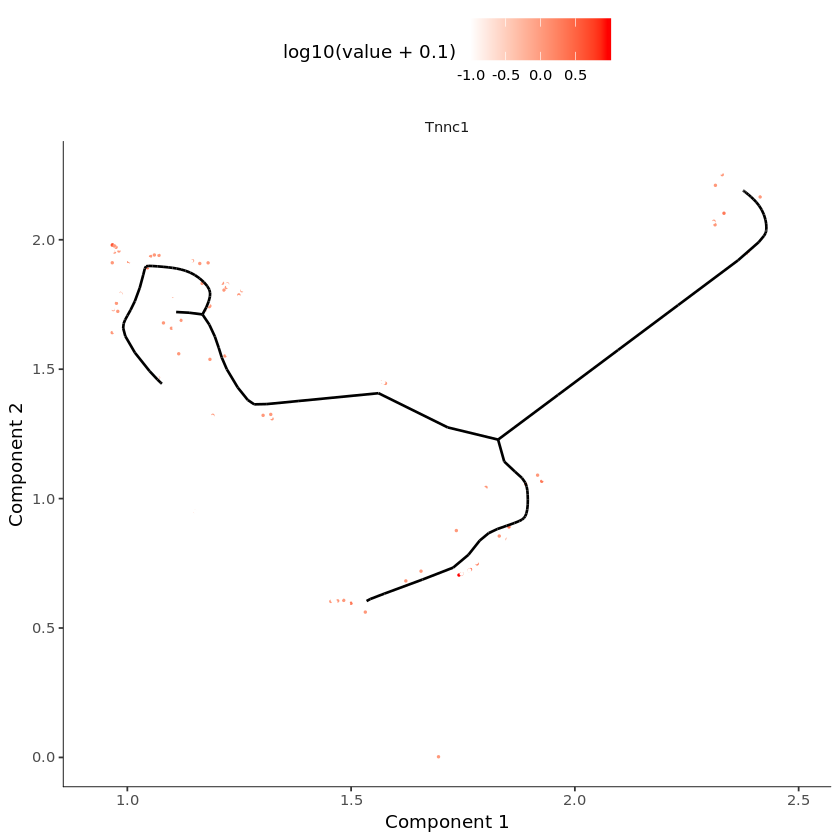

In [28]:
plot_marker_gene(cds, "Tnnc1", cell_size)

## Blood dim 10 Myog

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-myog-0.3-direct.svg

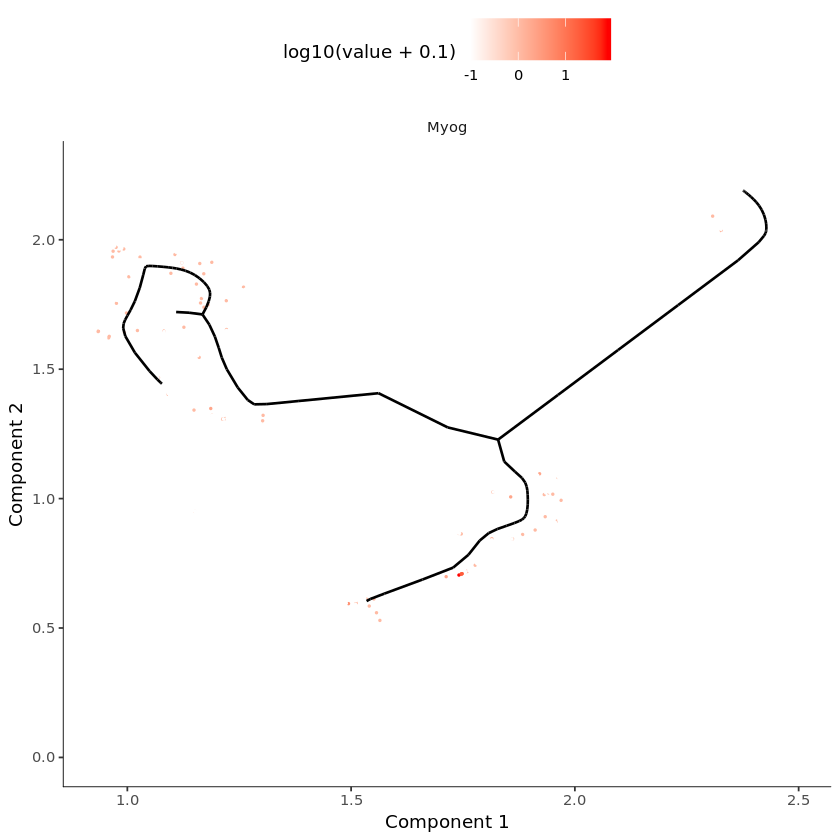

In [29]:
plot_marker_gene(cds, "Myog", cell_size)

## Blood dim 10 Col1a1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-col1a1-0.3-direct.svg

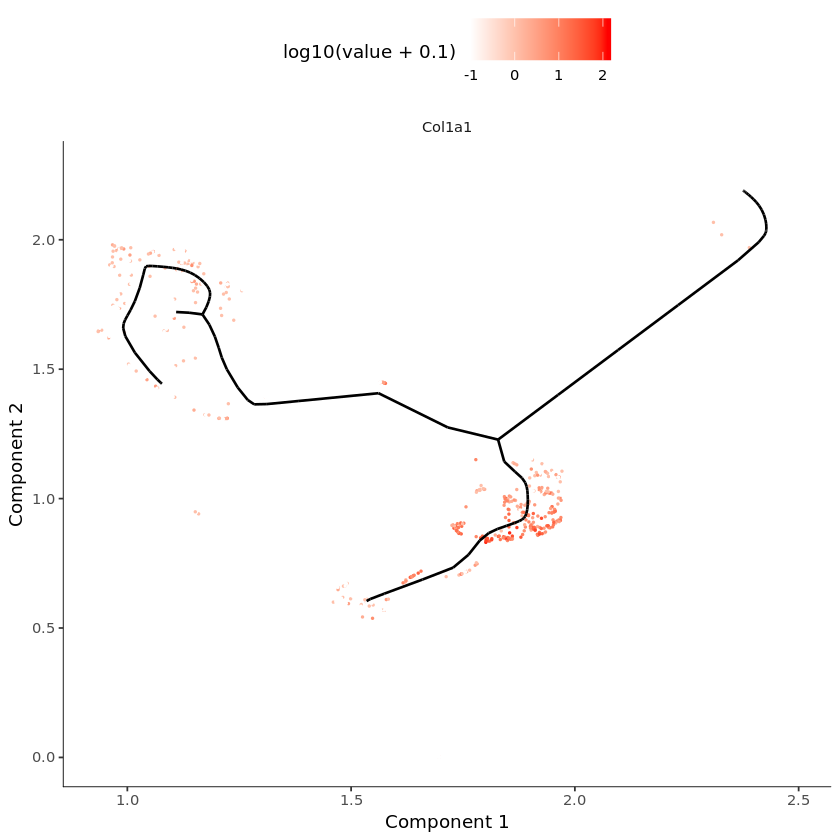

In [30]:
plot_marker_gene(cds, "Col1a1", cell_size)

## Blood dim 10 Pax7

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-pax7-0.3-direct.svg

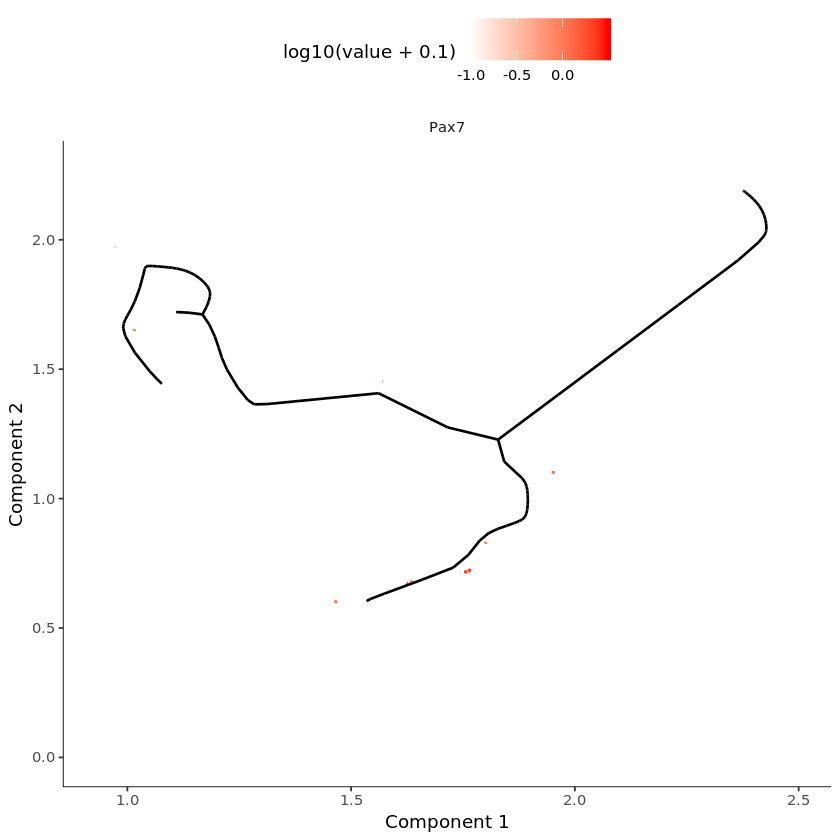

In [31]:
plot_marker_gene(cds, "Pax7", cell_size)

## Blood dim 10 Myf5

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-myf5-0.3-direct.svg

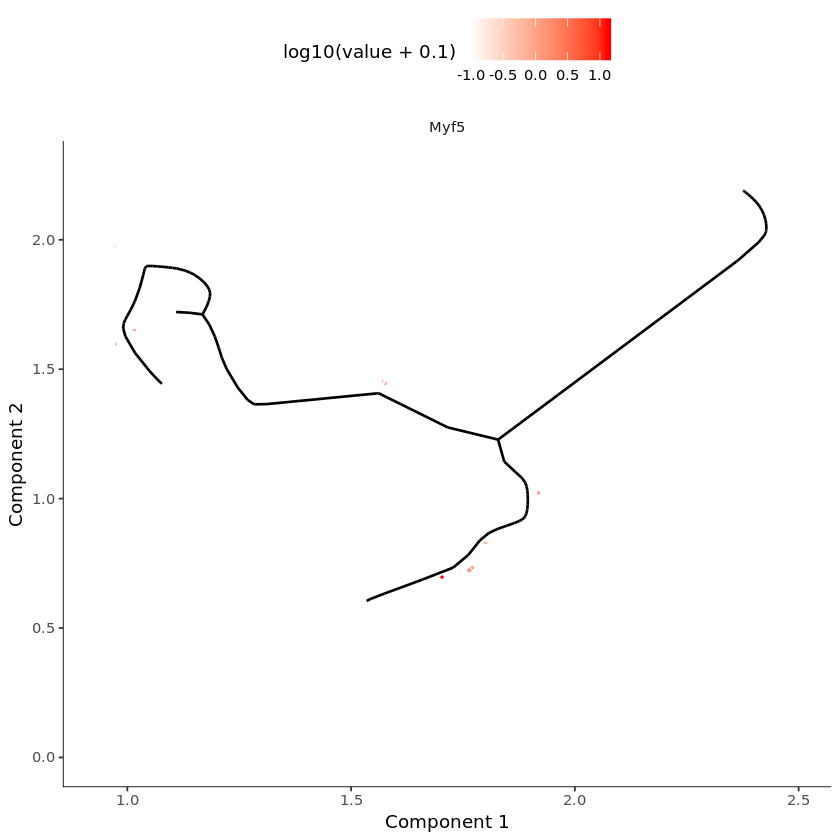

In [32]:
plot_marker_gene(cds, "Myf5", cell_size)

## Blood dim 10 Sox8

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-sox8-0.3-direct.svg

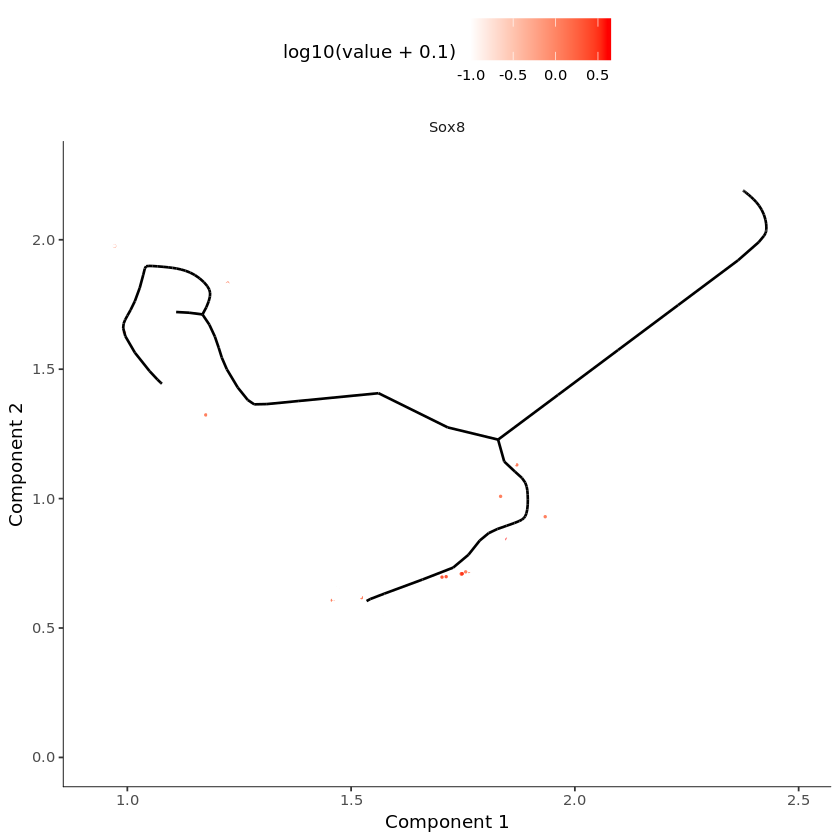

In [33]:
plot_marker_gene(cds, "Sox8", cell_size)

## Blood dim 10 Sp5

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-sp5-0.3-direct.svg

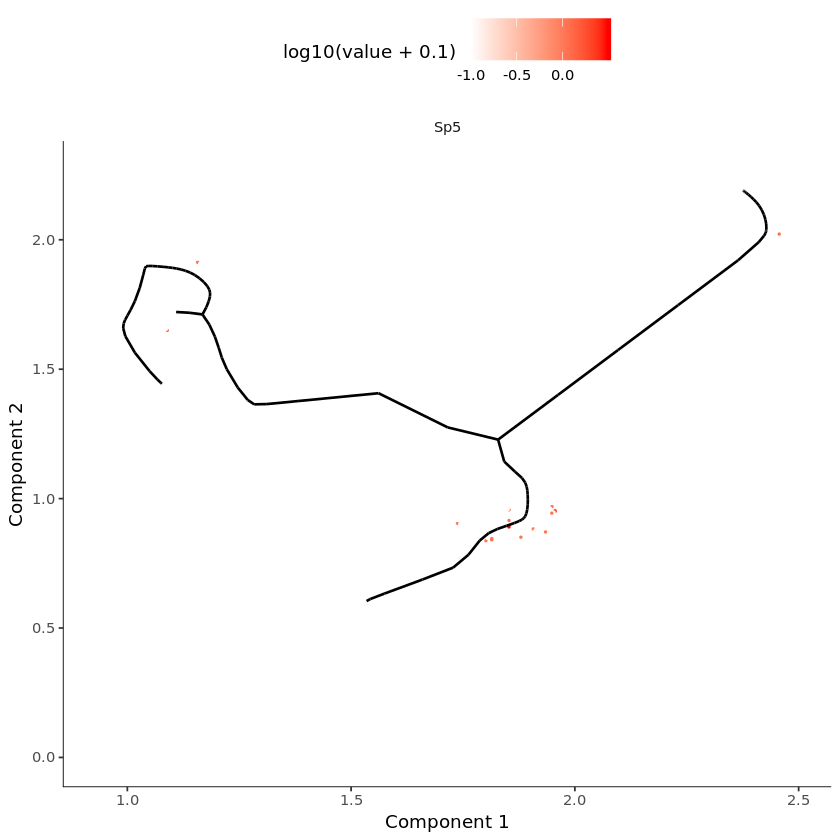

In [34]:
plot_marker_gene(cds, "Sp5", cell_size)

## Blood dim 10 Pdgfra

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-pdgfra-0.3-direct.svg

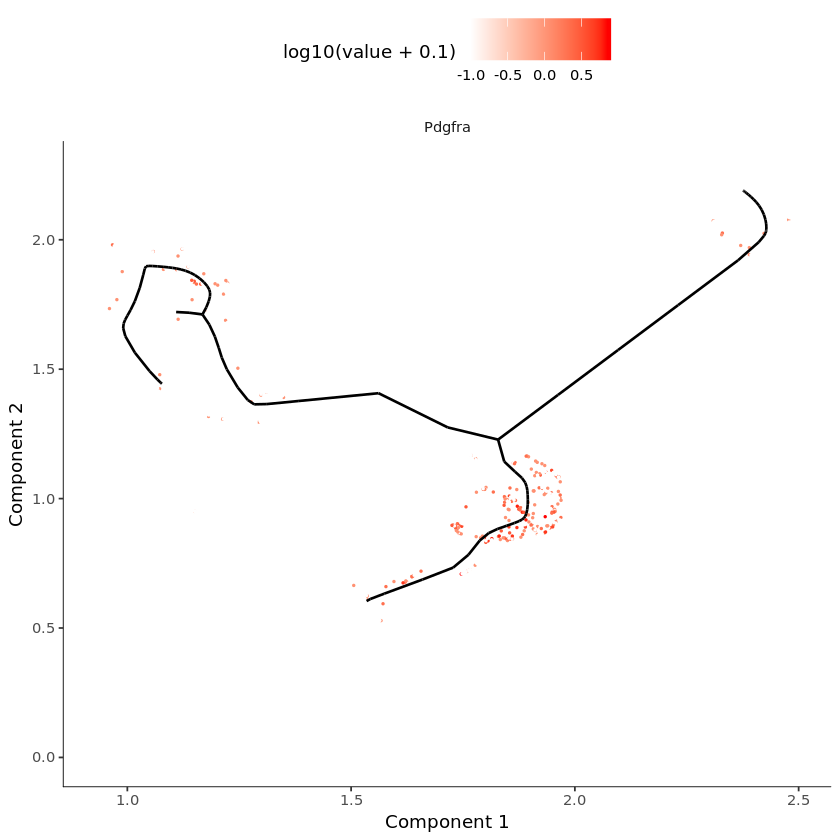

In [35]:
plot_marker_gene(cds, "Pdgfra", cell_size)

## Blood dim 10 Rarg

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-rarg-0.3-direct.svg

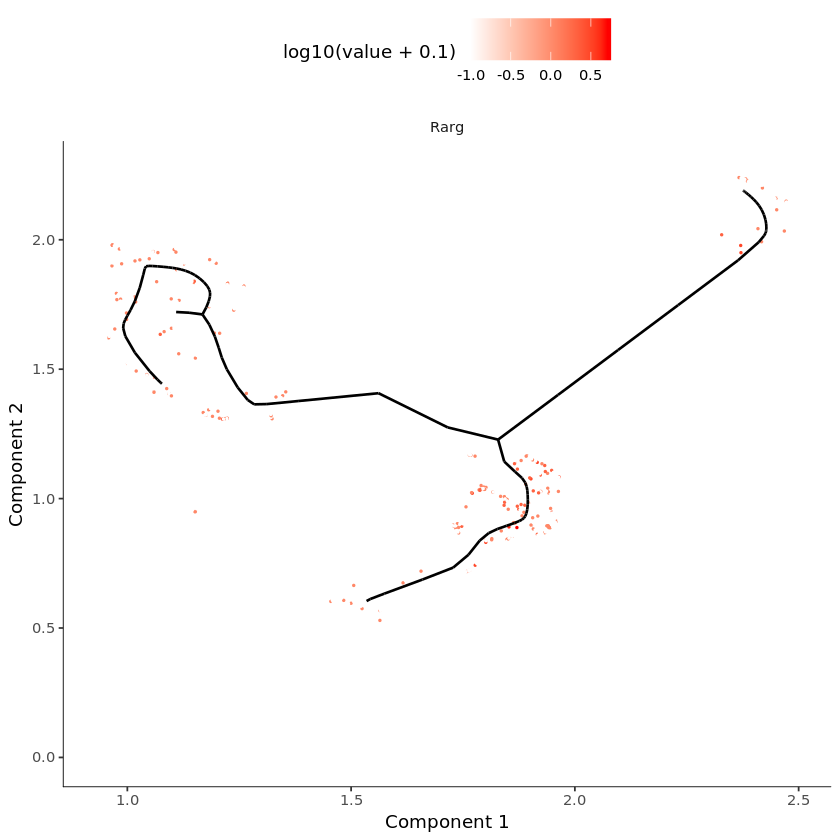

In [36]:
plot_marker_gene(cds, "Rarg", cell_size)

## Blood dim 10 Six1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-six1-0.3-direct.svg

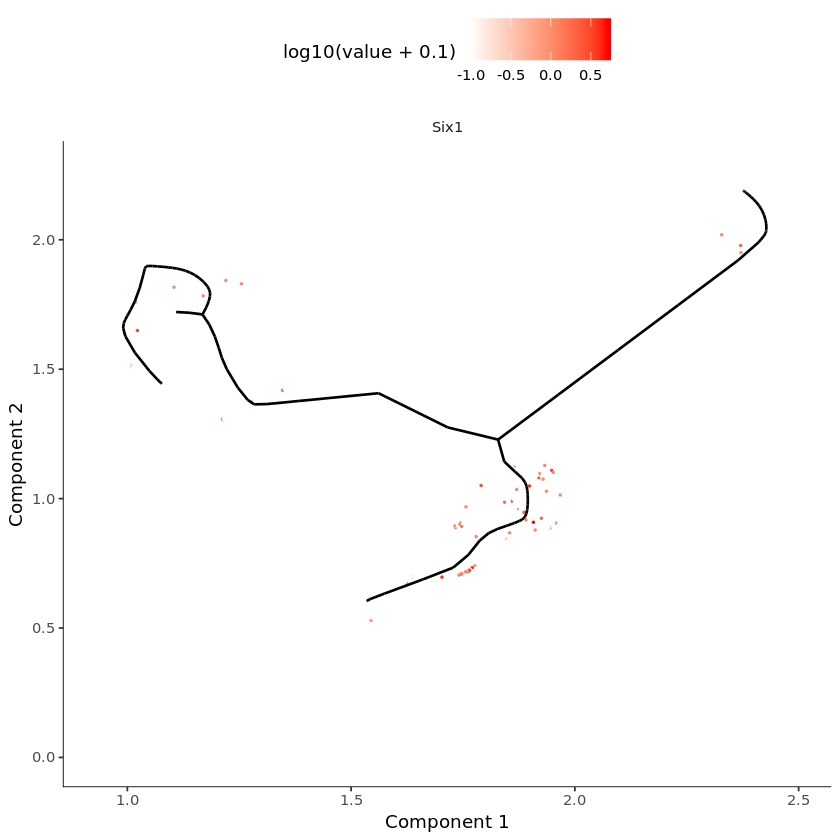

In [37]:
plot_marker_gene(cds, "Six1", cell_size)

## Blood dim 10 Pitx2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-pitx2-0.3-direct.svg

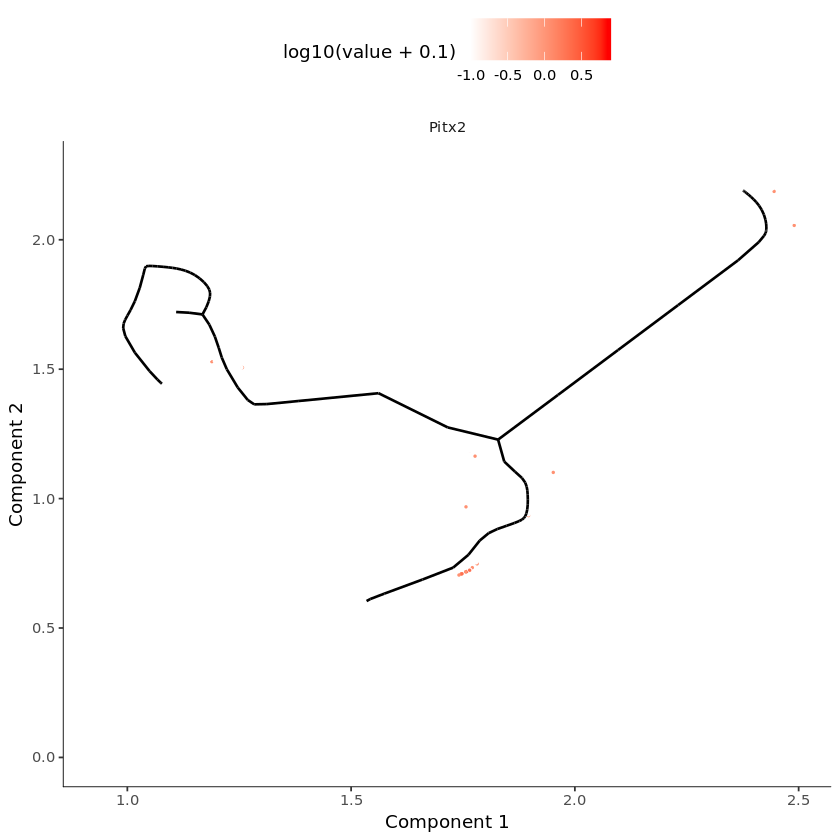

In [38]:
plot_marker_gene(cds, "Pitx2", cell_size)

## Blood dim 10 Pitx3

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-pitx3-0.3-direct.svg

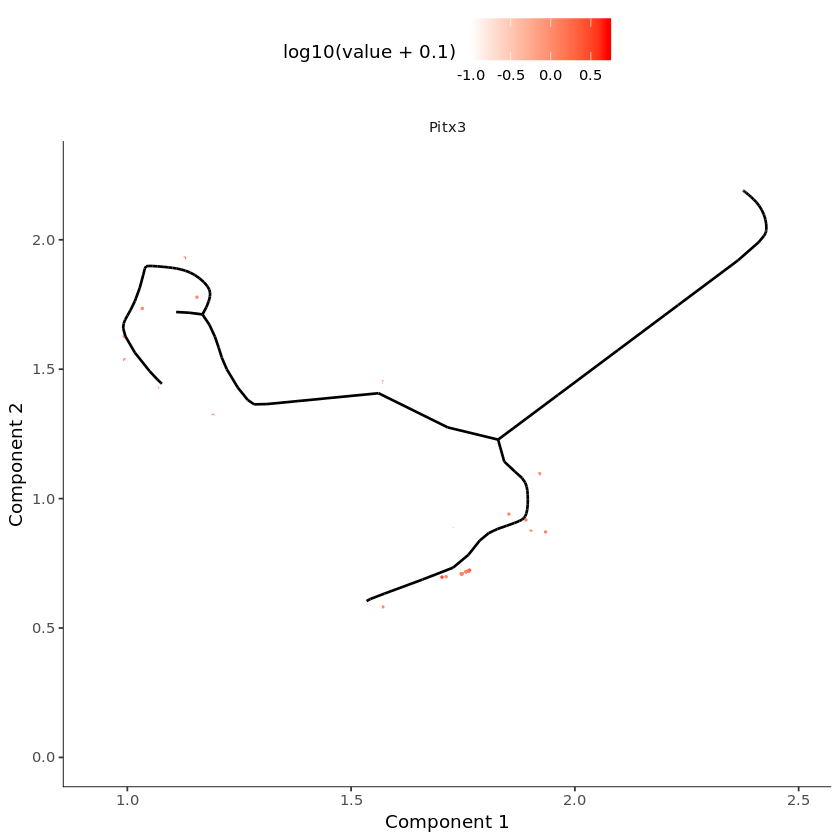

In [39]:
plot_marker_gene(cds, "Pitx3", cell_size)

## Blood dim 10 Fgfr1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-fgfr1-0.3-direct.svg

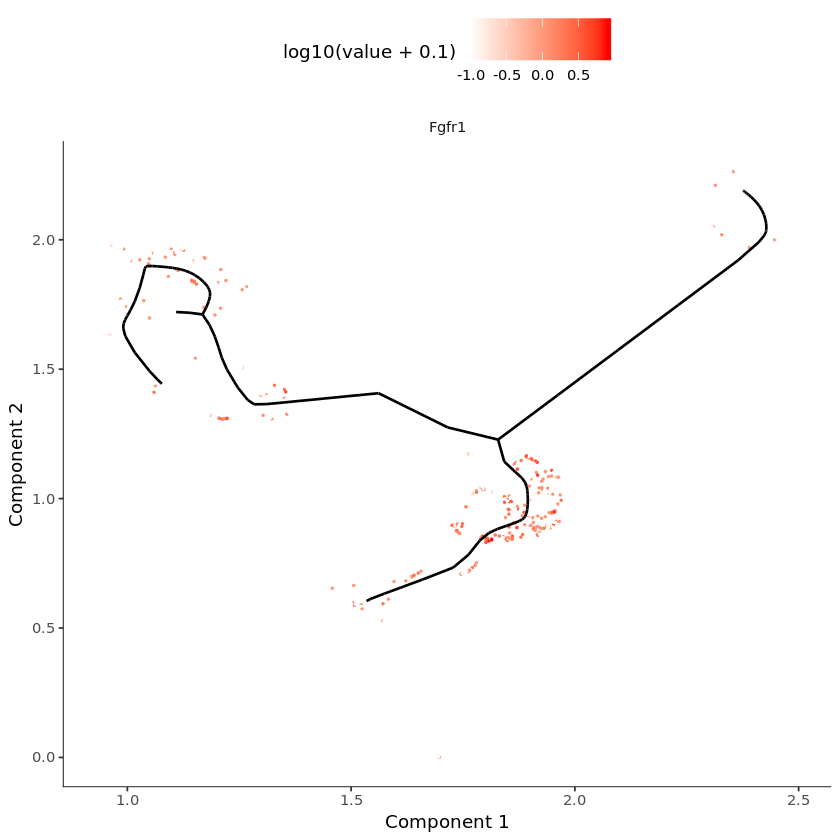

In [40]:
plot_marker_gene(cds, "Fgfr1", cell_size)

## Blood dim 10 Yap1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-yap1-0.3-direct.svg

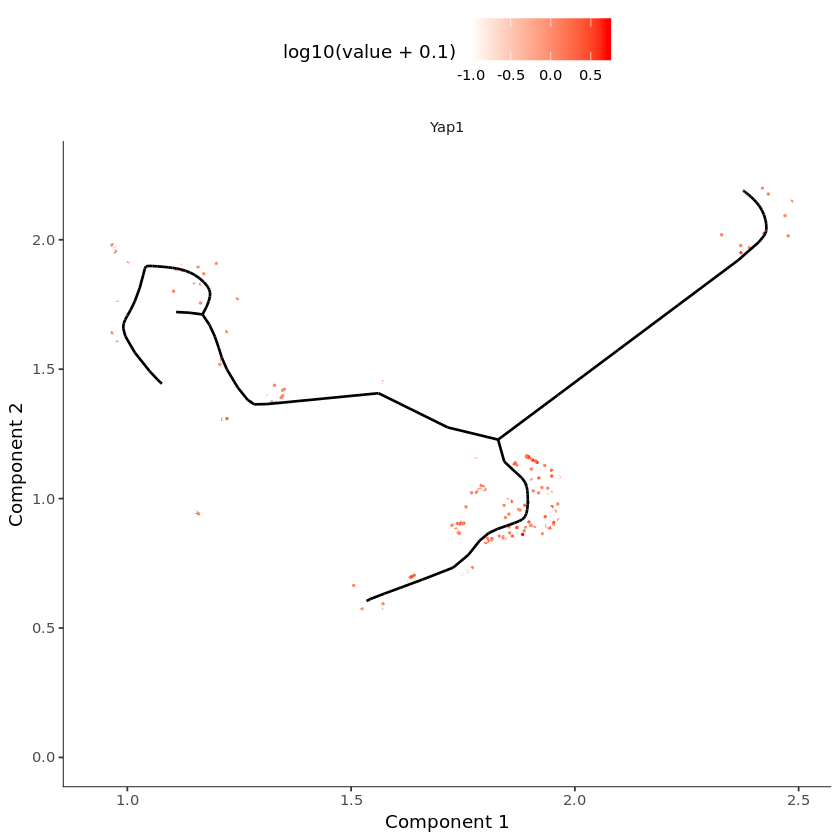

In [41]:
plot_marker_gene(cds, "Yap1", cell_size)

## Blood dim 10 Bmpr1a

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-bmpr1a-0.3-direct.svg

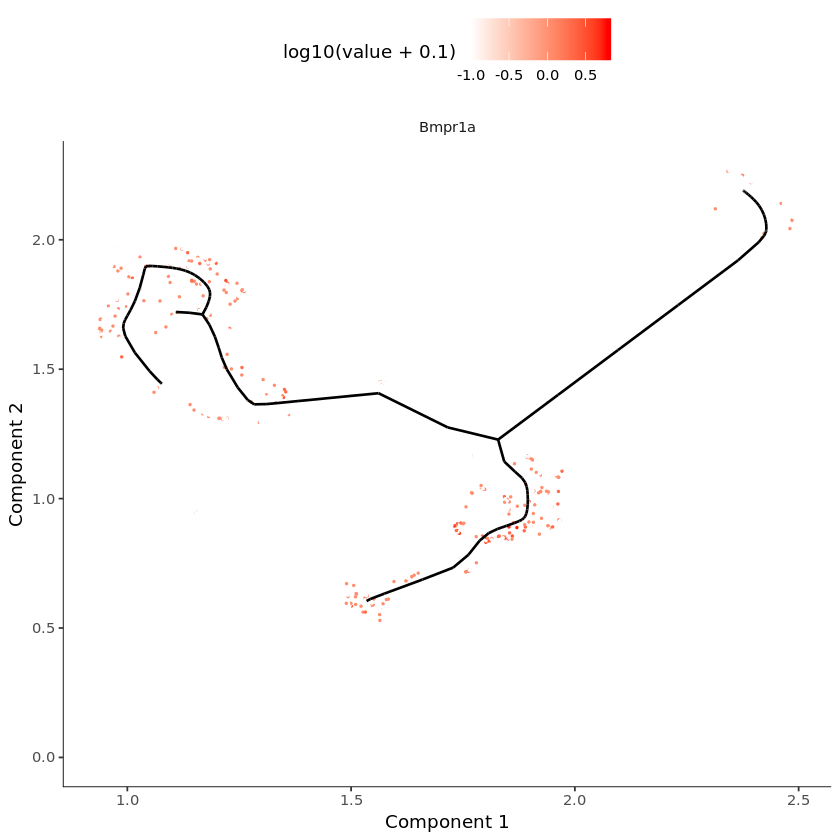

In [42]:
plot_marker_gene(cds, "Bmpr1a", cell_size)

## Blood dim 10 Zfp36l1

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-zfp36l1-0.3-direct.svg

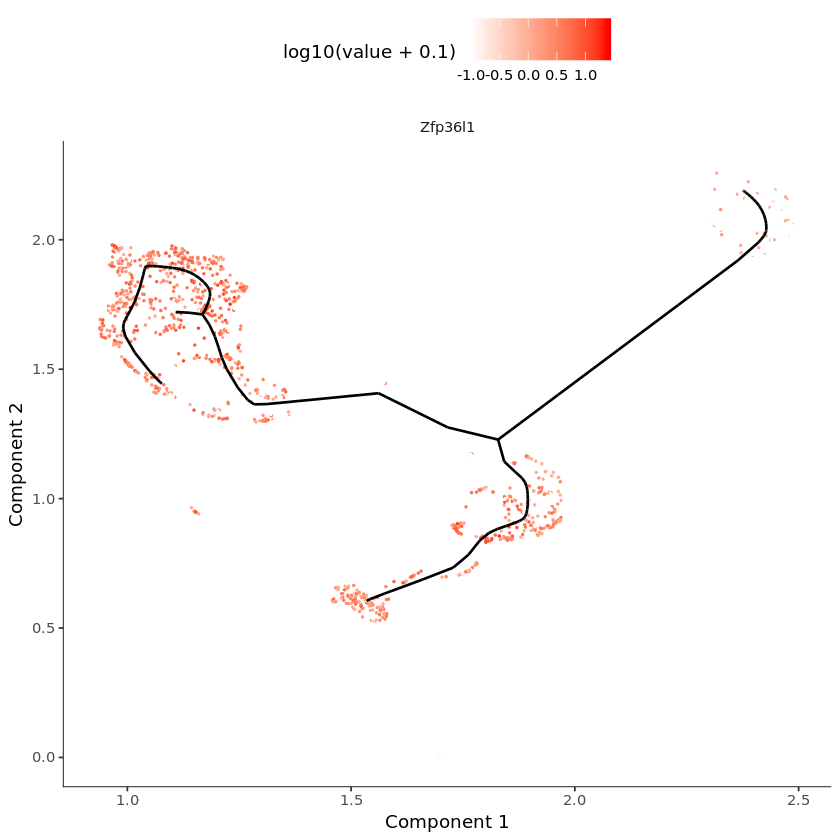

In [43]:
plot_marker_gene(cds, "Zfp36l1", cell_size)

## Blood dim 10 Tead2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-tead2-0.3-direct.svg

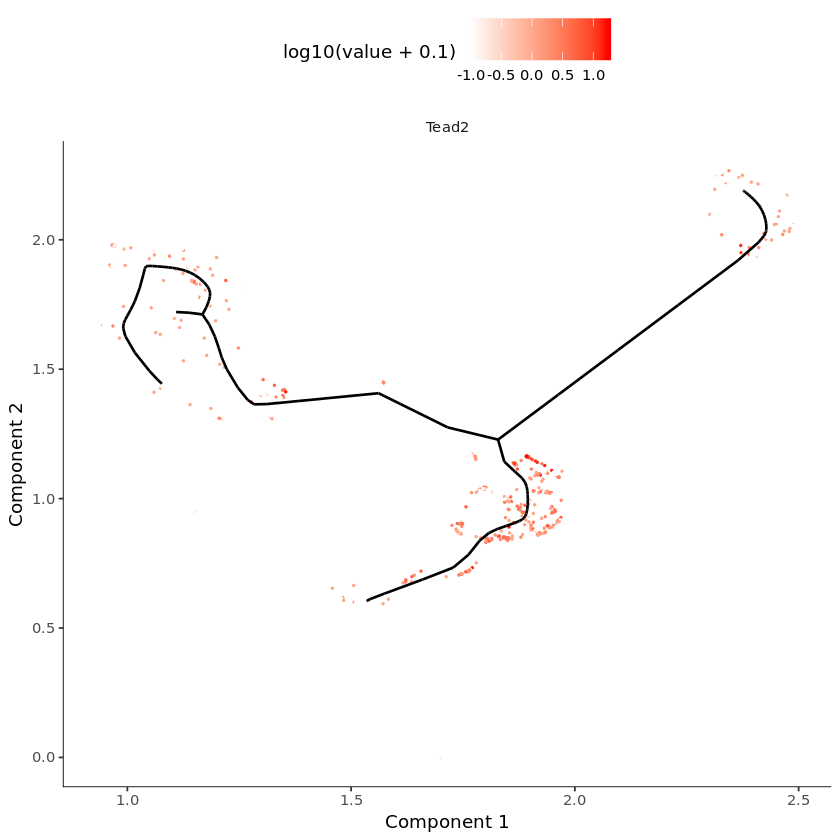

In [44]:
plot_marker_gene(cds, "Tead2", cell_size)

## Blood dim 10 Six4

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-six4-0.3-direct.svg

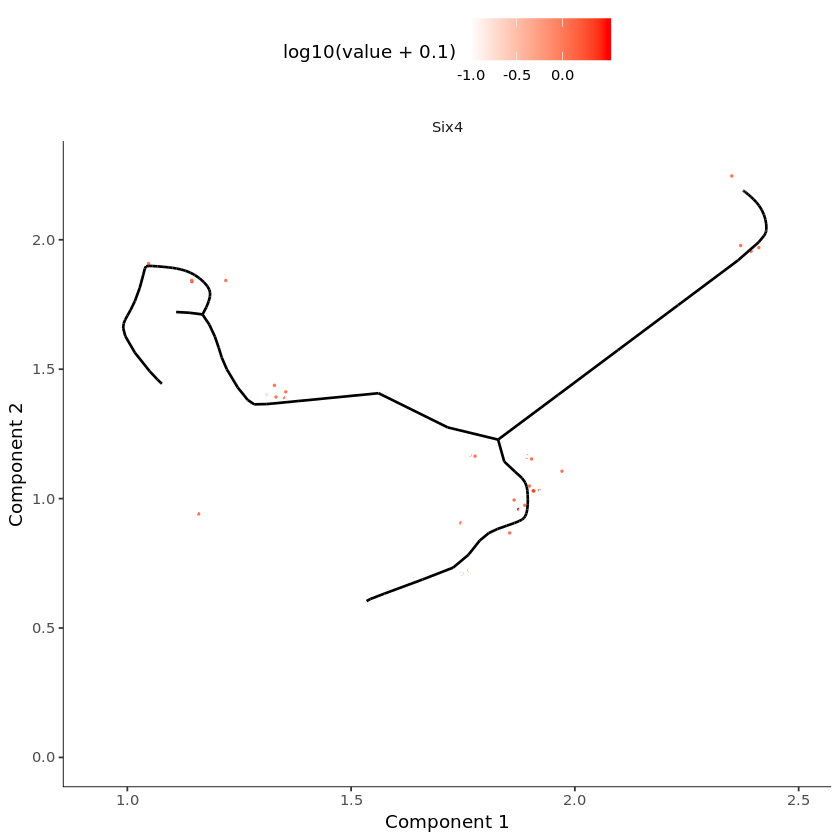

In [45]:
plot_marker_gene(cds, "Six4", cell_size)

## Blood dim 10 Scx

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-scx-0.3-direct.svg

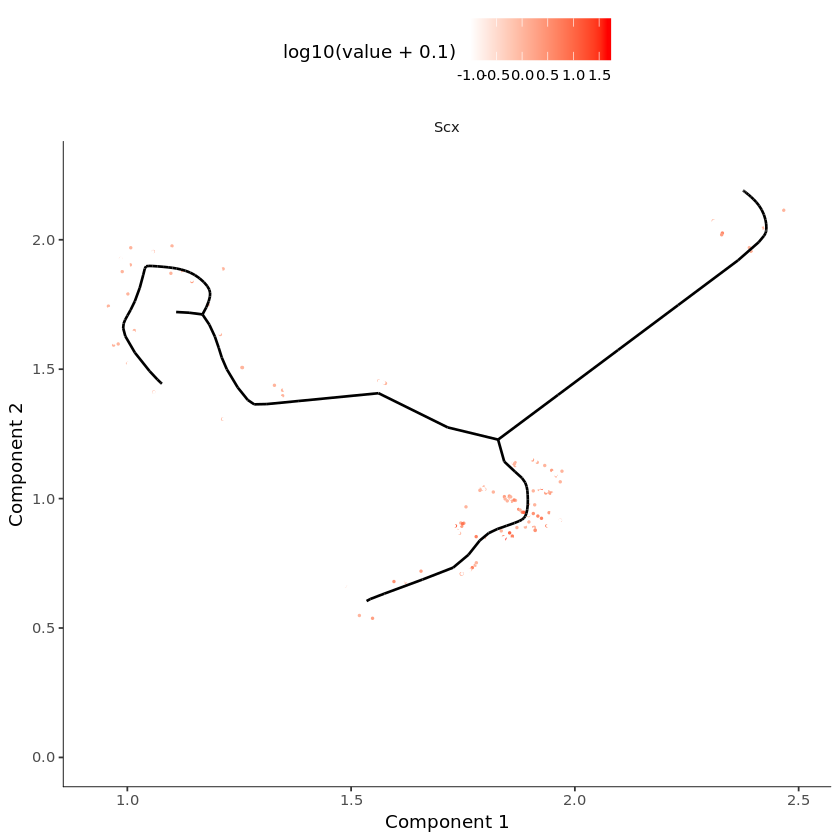

In [47]:
plot_marker_gene(cds, "Scx", cell_size)

## Blood dim 10 Tcf15

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-tcf15-0.3-direct.svg

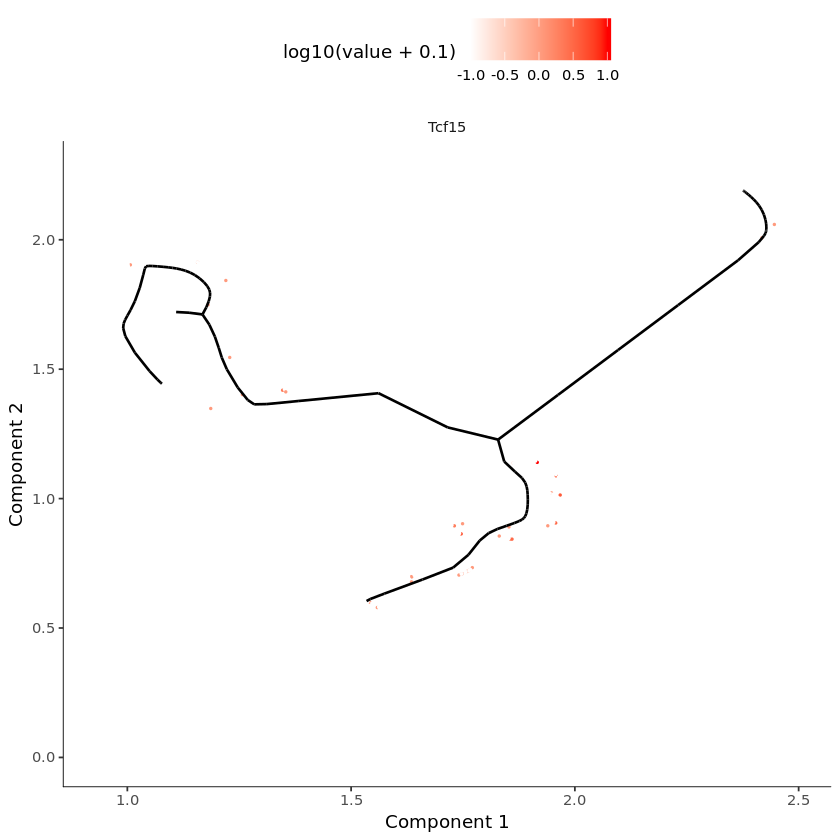

In [48]:
plot_marker_gene(cds, "Tcf15", cell_size)

## Blood dim 10 Ptk7

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Saving to blood-dim10-ptk7-0.3-direct.svg

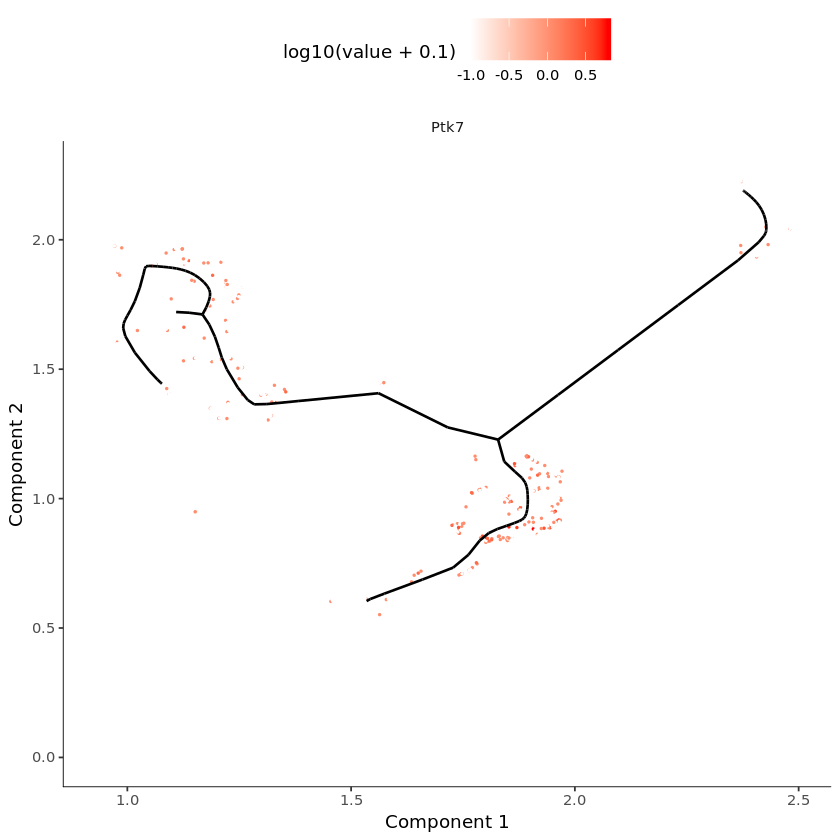

In [49]:
plot_marker_gene(cds, "Ptk7", cell_size)